# Marvel Heroes Classifier

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline
scores = []

In [253]:
heroes = pd.read_csv("./marvel_heroes.csv", low_memory=False)
heroes

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2044,n2045,n2046,n2047,category,image name,image,size,width,height
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,discrete,string,string,continuous,continuous,continuous
1,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,...,hidden=True,hidden=True,hidden=True,hidden=True,class,meta,meta origin=C:/Users/danie/OneDrive/Escritorio...,meta,meta,meta
2,0.27422603964805603,0.5130622386932373,0.19750401377677917,0.6651046872138977,0.3301742672920227,0.8497136831283569,0.34147951006889343,0.2270352691411972,0.44702714681625366,0.3483003079891205,...,0.14365367591381073,0.28771188855171204,0.9408237934112549,0.4521152377128601,AntMan,am1,AntMan\am1.jpg,9513,189,267
3,0.3909274637699127,0.15654151141643524,0.014352829195559025,0.2746833860874176,0.33634400367736816,0.5352840423583984,0.2662665545940399,0.11208049207925797,0.15499718487262726,0.24032239615917206,...,0.0,0.44612357020378113,0.11478640139102936,0.03531818836927414,AntMan,am10,AntMan\am10.jpg,11919,183,170
4,0.44503840804100037,0.2093852460384369,0.08834338188171387,0.1398928463459015,0.219475656747818,0.3507840037345886,0.11168737709522247,0.15839426219463348,0.39404603838920593,0.09359703958034515,...,0.05090305954217911,0.131569042801857,0.4603179097175598,0.1620040088891983,AntMan,am11,AntMan\am11.jpg,11497,130,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.6076920628547668,0.20681361854076385,0.2795215845108032,0.750008761882782,0.03742990642786026,0.6836578249931335,0.460115909576416,0.021154187619686127,0.009354532696306705,0.13390430808067322,...,0.5051543712615967,0.05747596547007561,0.361420214176178,0.48455438017845154,Yondu,Yondu5,Yondu\Yondu5.jpg,323829,900,600
1225,0.21667155623435974,0.22416359186172485,0.31286805868148804,0.37881430983543396,0.07685325294733047,0.633330225944519,0.15952546894550323,0.2773144841194153,0.26735398173332214,0.2274545580148697,...,0.3531288504600525,0.05698486045002937,0.5122082829475403,0.46304985880851746,Yondu,Yondu6,Yondu\Yondu6.jpg,91781,600,900
1226,0.32409927248954773,0.128073051571846,0.31649696826934814,0.28184181451797485,0.08878576010465622,0.27255943417549133,0.31546682119369507,0.14756551384925842,0.6885825395584106,0.37371179461479187,...,0.41204991936683655,0.19366833567619324,0.201227605342865,0.038637034595012665,Yondu,Yondu7,Yondu\Yondu7.jpg,137120,1080,608
1227,0.05485554412007332,0.0949731320142746,0.419885516166687,0.3151038885116577,0.3066489100456238,0.8452869057655334,0.13535401225090027,0.15804879367351532,0.5329582691192627,0.46088987588882446,...,0.10406415909528732,0.09393002837896347,0.09628324955701828,0.034723907709121704,Yondu,Yondu8,Yondu\Yondu8.jpg,110940,1000,600


Eliminamos las filas y columnas que no necesitamos, y nos queda así

In [254]:
data = heroes.drop([0,1], axis=0).drop(["image name", "image", "size", "width", "height"], axis=1)
data

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2039,n2040,n2041,n2042,n2043,n2044,n2045,n2046,n2047,category
2,0.27422603964805603,0.5130622386932373,0.19750401377677917,0.6651046872138977,0.3301742672920227,0.8497136831283569,0.34147951006889343,0.2270352691411972,0.44702714681625366,0.3483003079891205,...,0.11347939074039459,0.14351454377174377,0.9196330308914185,0.5018442273139954,0.22135856747627258,0.14365367591381073,0.28771188855171204,0.9408237934112549,0.4521152377128601,AntMan
3,0.3909274637699127,0.15654151141643524,0.014352829195559025,0.2746833860874176,0.33634400367736816,0.5352840423583984,0.2662665545940399,0.11208049207925797,0.15499718487262726,0.24032239615917206,...,0.34253931045532227,0.062376346439123154,0.4729800820350647,0.08321055769920349,0.20063252747058868,0.0,0.44612357020378113,0.11478640139102936,0.03531818836927414,AntMan
4,0.44503840804100037,0.2093852460384369,0.08834338188171387,0.1398928463459015,0.219475656747818,0.3507840037345886,0.11168737709522247,0.15839426219463348,0.39404603838920593,0.09359703958034515,...,0.04651951044797897,0.0029234024696052074,0.01852383092045784,0.16262683272361755,0.11162180453538895,0.05090305954217911,0.131569042801857,0.4603179097175598,0.1620040088891983,AntMan
5,0.31128111481666565,0.07172613590955734,0.5153834819793701,0.21563135087490082,0.4494512677192688,0.273296982049942,0.3722347319126129,0.22142131626605988,0.32087886333465576,0.6888936758041382,...,0.0970277190208435,0.44128334522247314,0.28743210434913635,0.6640902757644653,0.3101569414138794,0.08053146302700043,0.4820149540901184,0.6153862476348877,0.04998486116528511,AntMan
6,0.8323779702186584,0.02382960170507431,0.3483598828315735,0.09974165260791779,0.1981322467327118,0.31502750515937805,0.14462947845458984,0.16120801866054535,0.15198588371276855,0.32881781458854675,...,0.27355313301086426,0.06471620500087738,0.31111395359039307,0.21107259392738342,0.3672437071800232,0.21626657247543335,0.1867925226688385,0.29613739252090454,0.43454355001449585,AntMan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.6076920628547668,0.20681361854076385,0.2795215845108032,0.750008761882782,0.03742990642786026,0.6836578249931335,0.460115909576416,0.021154187619686127,0.009354532696306705,0.13390430808067322,...,0.6128018498420715,0.4215421974658966,1.3156733512878418,0.619458794593811,0.06870965659618378,0.5051543712615967,0.05747596547007561,0.361420214176178,0.48455438017845154,Yondu
1225,0.21667155623435974,0.22416359186172485,0.31286805868148804,0.37881430983543396,0.07685325294733047,0.633330225944519,0.15952546894550323,0.2773144841194153,0.26735398173332214,0.2274545580148697,...,0.6609838604927063,0.3176787197589874,0.18392714858055115,0.20316463708877563,0.1506766676902771,0.3531288504600525,0.05698486045002937,0.5122082829475403,0.46304985880851746,Yondu
1226,0.32409927248954773,0.128073051571846,0.31649696826934814,0.28184181451797485,0.08878576010465622,0.27255943417549133,0.31546682119369507,0.14756551384925842,0.6885825395584106,0.37371179461479187,...,0.5219006538391113,0.45372772216796875,0.4980356693267822,0.38112249970436096,0.1611519753932953,0.41204991936683655,0.19366833567619324,0.201227605342865,0.038637034595012665,Yondu
1227,0.05485554412007332,0.0949731320142746,0.419885516166687,0.3151038885116577,0.3066489100456238,0.8452869057655334,0.13535401225090027,0.15804879367351532,0.5329582691192627,0.46088987588882446,...,0.3885060250759125,0.6833115816116333,0.37197405099868774,0.7266562581062317,0.09118488430976868,0.10406415909528732,0.09393002837896347,0.09628324955701828,0.034723907709121704,Yondu


Hacemos limpieza de nuestra información, quitando las filas y columnas que no nos son de utilidad y partiendo la información en X y Y para alimentar los modelos

Eliminamos las imágenes duplicadas

In [255]:
data = data.drop_duplicates()
data.shape

(1152, 2049)

Después de la limpieza nos quedan 1152 imágenes diferentes de los diversos heroes

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 2 to 1228
Columns: 2049 entries, n0 to category
dtypes: object(2049)
memory usage: 18.0+ MB


Los heroes a reconocer en el dataset están como:
<ol>
<li>antman</li>
<li>black panter</li>
<li>black widow</li>
<li>captain america</li>
<li>captain marvel</li>
<li>drax</li>
<li>dr strange</li>
<li>gamora</li>
<li>hawk eye</li>
<li>hulk</li>
<li>ironman</li>
<li>loki</li>
<li>quake</li>
<li>scarlett witch</li>
<li>spiderman</li>
<li>thor</li>
<li>valkyrie</li>
<li>vision</li>
<li>winter soldier</li>
<li>yondu</li>
</ol>

### Iniciamos la separación de los datos para el entrenamiento

Separamos la columna categoría de los demás datos por que es la columna que nos va a ayudar a verificar que los resultados son correctos de nuestros modelos.

In [257]:
ydata = data.category
Xdata = data.drop(["category"], axis=1)
Xdata = Xdata.convert_dtypes()

Separamos los datos en entrenamiento y test, dividiéndolos entre 70% para entrenamiento y 30% para pruebas.

In [258]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)

## Creación y entrenamiento de modelos

### Random Forest: 

In [259]:
from sklearn.ensemble import RandomForestClassifier

Primero vamos a probar el modelo con los parámetros default para ver cuál es el resultado que nos da.

In [260]:
RF_model1 = RandomForestClassifier(random_state=10).fit(X_train, y_train)

In [261]:
scores.append(RF_model1.score(X_test, y_test))
print(RF_model1.score(X_test, y_test))

0.6329479768786127


Tuvimos 63% de efectividad, es un resultado muy bajo y necesitamos mejorarlo.

In [262]:
best_score = 0
depth = 60
final_depth = 0
for it in range(0,5,1):
    clf1 = RandomForestClassifier(max_depth=(depth+10*(it+1)),random_state=10).fit(X_train, y_train)
    clf2 = RandomForestClassifier(max_depth=(depth-10*(it+1)),random_state=10).fit(X_train, y_train)
    score1 = clf1.score(X_test, y_test)
    score2 = clf2.score(X_test, y_test)
    if(score1 > best_score):
        best_score = score1
        final_depth = depth+10*(it+1)
    if(score2 > best_score):
        best_score = score2
        final_depth = depth-10*(it+1)
scores.append(best_score)
print(final_depth)

70


Al intentar ajustar el modelo para que tenga la profundidad adecuada el modelo no mejoró, nos dió el mismo resultado.

In [263]:
RF_model2 = RandomForestClassifier(n_estimators=100, max_depth=final_depth, random_state=10).fit(X_train, y_train)

In [264]:
RF_model2.score(X_test, y_test)

0.6329479768786127

In [265]:
RF_predict = RF_model2.predict(X_test)

In [266]:
print(confusion_matrix(RF_predict, y_test))

[[ 1  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1 41  0  2  0  0  6  0  0  1  3  6  5  0  2  1  0  1  0]
 [ 1  0  0 13  0  0  0  0  1  0  0  0  0  0  1  0  0  4  1  1]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  1 21  0  0  1  0  0  4  0  2  0  0  1  0  1  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  4  0  1 26  1  0  0  0  0  2  0  0  1  0]
 [ 6  2  1  3  1  0  0  0  0  2 29  1  0  0  0  3  1  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  3  0  0  0  0  1  7  0  0  0  0  0  0]
 [ 3  2  0  2  0  1  2  0  1  0  0  0  0  0 36  3  0  2  0  0]
 [ 2  2  0  4  1  1  0  0  0  0  1  0  0  0  0 17  1  0

In [267]:
cross_val_score(RF_model1, X_test, y_test, cv=3, scoring="accuracy")

array([0.49137931, 0.53043478, 0.46956522])

In [268]:
cross_val_score(RF_model2, X_test, y_test, cv=3, scoring="accuracy")

array([0.49137931, 0.53043478, 0.46956522])

### SVM:

In [269]:
from sklearn import svm

Utilizamos el modelo default de support vector machines para ver que resultado nos arroja sin intentar mejorarlo.

In [270]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

In [271]:
scores.append(SVM_model1.score(X_test, y_test))
print(SVM_model1.score(X_test, y_test))

0.7398843930635838


Tenemos un 73% de efectividad, es un resultado regular. Ahora intentaremos mejorar el modelo a ver si mejora el resultado.

In [272]:
par_C = 1
i = 0.1
best_score = 0
for it in range (5):
    test_model = svm.SVC(C=i, random_state=42).fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    if(test_score > best_score):
        par_C = i
        best_score = test_score
    i += 1

i = par_C
for it in range(5):
    test_model = svm.SVC(C=i, random_state=42).fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    if(test_score > best_score):
        par_C = i
        best_score = test_score
    i += .2
scores.append(best_score)
print(par_C, best_score)

3.1 0.7947976878612717


In [273]:
SVM_model2 = SVM_model1 = svm.SVC(C=par_C, random_state=2).fit(X_train, y_train)

In [274]:
SVM_model2.score(X_test, y_test)

0.7947976878612717

Después de intentar buscar una iteración del modelo que se adapte mejor obtenemos 79% de efectividad que es un buen resultado, no tan bueno pero no está mal.

In [275]:
SVM_predict = SVM_model2.predict(X_test)

In [276]:
print(confusion_matrix(SVM_predict, y_test))

[[12  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 42  0  0  0  0  4  0  0  0  2  4  2  0  2  0  0  0  0]
 [ 0  0  0 22  0  2  0  0  1  0  0  0  0  0  0  1  1  2  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  0  1 21  0  0  0  1  0  1  0  2  0  0  1  0  0  3]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 26  0  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  2  1  0  0  2]
 [ 1  0  0  0  0  0  0  0  0  0  0 10  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  3  0  0  0  0  1  9  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  1  0  1  1 36  1  0  0  0  0]
 [ 1  0  0  1  1  1  0  0  0  0  0  1  0  0  0 18  0  0

In [277]:
cross_val_score(SVM_model1, X_test, y_test, cv=3, scoring="accuracy")

array([0.63793103, 0.67826087, 0.60869565])

In [278]:
cross_val_score(SVM_model2, X_test, y_test, cv=3, scoring="accuracy")

array([0.63793103, 0.67826087, 0.60869565])

### MLP: 

In [279]:
from sklearn.neural_network import MLPClassifier

In [280]:
MLP_model1 = MLPClassifier(hidden_layer_sizes=(100,20), random_state=2, max_iter=300).fit(X_train, y_train)

In [281]:
scores.append(MLP_model1.score(X_test, y_test))
print(MLP_model1.score(X_test, y_test))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.7716763005780347


Intentamos mejorar el resultado moviendo algunos parámetros

In [282]:
MLP_model2 = MLPClassifier(hidden_layer_sizes=(120,30), random_state=2, max_iter=300).fit(X_train, y_train)

In [283]:
scores.append(MLP_model2.score(X_test, y_test))
print(MLP_model2.score(X_test, y_test))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.8179190751445087


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [284]:
MLP_predict = MLP_model2.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [285]:
print(confusion_matrix(MLP_predict, y_test))

[[11  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  1  0  0  0  0  0  0  4  1  0  0  0  0  0  0]
 [ 0  0  0 21  0  2  0  0  1  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  7  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0 19  0  1  0  1  1  0  0  1  1  0  1  0  0  1]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 26  0  0  0  0  0  0  0  1  0  0]
 [ 2  0  0  0  0  0  0  0  0  0 30  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  1  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  3  0  0  0  0  1 11  2  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  1 34  1  0  0  0  0]
 [ 1  0  0  1  1  2  0  0  0  0  0  0  0  0  0 23  0  0

In [286]:
cross_val_score(MLP_model1, X_test, y_test, cv=3, scoring="accuracy")

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([0.59482759, 0.66086957, 0.62608696])

In [287]:
cross_val_score(MLP_model2, X_test, y_test, cv=3, scoring="accuracy")

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([0.68965517, 0.73913043, 0.65217391])

# Cambiando el dataset <hr> 
<p>El dataset se encuentra en <a href="https://www.kaggle.com/hchen13/marvel-heroes">kaggle</a> pero nosotros nos encargamos de limpiar el dataset, eliminando imágenes que no correspondían a la categoría en la que se encontraban antes de realizar image embedding</p>

In [288]:
train_data = pd.read_csv("./train_data.csv", low_memory=False)
test_data = pd.read_csv("./test_data.csv", low_memory=False)
train_data

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2044,n2045,n2046,n2047,category,image name,image,size,width,height
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,discrete,string,string,continuous,continuous,continuous
1,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,...,hidden=True,hidden=True,hidden=True,hidden=True,class,meta,meta origin=D:/descargas/marvel/train type=image,meta,meta,meta
2,0.08733594417572021,0.037203025072813034,0.2055954933166504,0.10592283308506012,0.2693900465965271,0.5959622263908386,0.47047609090805054,0.6999545097351074,0.18336793780326843,0.21694627404212952,...,0.04365207254886627,0.374267041683197,0.48212316632270813,0.18592655658721924,black widow,pic_001,black widow\pic_001.jpg,749067,1161,1800
3,0.35176950693130493,0.03063351660966873,0.12587600946426392,0.07605662941932678,0.23087939620018005,0.7061294317245483,1.0815998315811157,0.46140551567077637,0.2476448267698288,0.5051647424697876,...,0.412617027759552,0.7512786984443665,0.519707441329956,0.2295246124267578,black widow,pic_002,black widow\pic_002.jpg,174658,1423,851
4,0.16139240562915802,0.35609832406044006,0.09352830797433853,0.389583945274353,0.20961834490299225,1.0320626497268677,0.6195237040519714,0.5073053240776062,0.2900763750076294,0.34132838249206543,...,0.22919270396232605,0.16304440796375275,0.8088128566741943,0.6921866536140442,black widow,pic_004,black widow\pic_004.jpg,38981,300,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,0.10894713550806046,0.12122203409671783,0.5201576948165894,0.5130882859230042,0.009831730276346207,0.6894831657409668,0.051184140145778656,0.19956734776496887,0.8414593935012817,0.715871274471283,...,1.0618752241134644,0.3228223919868469,0.2282554656267166,0.1673574149608612,thanos,pic_373,thanos\pic_373.jpg,758303,1400,1400
1231,0.4759216904640198,0.09509299695491791,0.12694518268108368,0.1599315106868744,0.16266852617263794,0.23086349666118622,0.11113361269235611,0.1063135415315628,0.2805590033531189,0.6172084212303162,...,0.48741164803504944,0.6482839584350586,0.6028993129730225,0.28364214301109314,thanos,pic_375,thanos\pic_375.jpg,119397,1400,700
1232,0.06263880431652069,0.07100561261177063,0.1282649040222168,0.13024954497814178,0.042278952896595,0.12278492003679276,0.009172244928777218,0.1243886947631836,0.21493646502494812,0.2831176817417145,...,0.01973191648721695,0.1164480447769165,0.06754473596811295,0.22419874370098114,thanos,pic_385,thanos\pic_385.jpg,111140,810,1080
1233,0.22262819111347198,0.5461528897285461,0.0805370882153511,0.5325539112091064,0.10027569532394409,1.1489337682724,0.4533189535140991,0.05879051238298416,0.45944511890411377,0.42270463705062866,...,0.5279499292373657,0.9062726497650146,0.57020103931427,0.2980791926383972,thanos,pic_391,thanos\pic_391.jpg,166074,1400,700


In [289]:
X_train = train_data.drop([0,1], axis=0).drop(["image name", "image", "size", "width", "height","category"], axis=1)
X_train.astype('float64').dtypes
y_train = train_data.drop([0,1],axis=0).category
X_test = test_data.drop([0,1], axis=0).drop(["image name", "image", "size", "width", "height","category"], axis=1)
X_test.astype('float64').dtypes
y_test = test_data.drop([0,1],axis=0).category

In [290]:
X_train.shape

(1233, 2048)

In [291]:
X_test.shape

(207, 2048)

En este dataset tenemos las categorías:
<ul>
<li>0 black widow</li>
<li>1 captain america</li>
<li>2 doctor strange</li>
<li>3 hulk</li>
<li>4 ironman</li>
<li>5 loki</li>
<li>6 spider-man</li>
<li>7 thanos</li>
 </ul>

### Random Forest: 

In [292]:
from sklearn.ensemble import RandomForestClassifier

Primero vamos a probar el modelo con los parámetros default para ver cuál es el resultado que nos da.

In [293]:
RF_model1 = RandomForestClassifier(random_state=10).fit(X_train, y_train)

In [294]:
scores.append(RF_model1.score(X_test, y_test))
print(RF_model1.score(X_test, y_test))

0.6618357487922706


In [295]:
best_score = 0
depth = 150
final_depth = 0
for it in range(0,5,1):
    clf1 = RandomForestClassifier(max_depth=(depth+10*(it+1)),random_state=10).fit(X_train, y_train)
    clf2 = RandomForestClassifier(max_depth=(depth-10*(it+1)),random_state=10).fit(X_train, y_train)
    score1 = clf1.score(X_test, y_test)
    score2 = clf2.score(X_test, y_test)
    if(score1 > best_score):
        best_score = score1
        final_depth = depth+10*(it+1)
    if(score2 > best_score):
        best_score = score2
        final_depth = depth-10*(it+1)
print(final_depth)

160


Al intentar ajustar el modelo para que tenga la profundidad adecuada mejoramos 4% de efectividad. Sigue siendo un número muy bajo.

In [296]:
RF_model2 = RandomForestClassifier(n_estimators=150, max_depth=160, random_state=10).fit(X_train, y_train)

In [297]:
scores.append(RF_model2.score(X_test, y_test))
print(RF_model2.score(X_test, y_test))

0.7053140096618358


In [298]:
RF_predict = RF_model2.predict(X_test)

In [299]:
confusion_matrix(RF_predict, y_test)

array([[16,  0,  2,  0,  0,  4,  0,  2],
       [ 0, 15,  0,  0,  1,  2,  1,  2],
       [ 0,  1, 16,  1,  0,  3,  1,  3],
       [ 0,  0,  0, 18,  0,  1,  0,  2],
       [ 0,  1,  0,  5, 22,  1,  0,  9],
       [ 2,  0,  2,  0,  0, 16,  1,  0],
       [ 1,  2,  2,  1,  3,  0, 31,  0],
       [ 0,  0,  1,  0,  2,  0,  2, 12]], dtype=int64)

In [300]:
cross_val_score(RF_model1, X_test, y_test, cv=3, scoring="accuracy")

array([0.63768116, 0.55072464, 0.30434783])

In [301]:
cross_val_score(RF_model2, X_test, y_test, cv=3, scoring="accuracy")

array([0.66666667, 0.55072464, 0.30434783])

### SVM:

In [302]:
from sklearn import svm

Utilizamos el modelo default de support vector machines para ver que resultado nos arroja sin intentar mejorarlo.

In [303]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

In [304]:
scores.append(SVM_model1.score(X_test, y_test))
print(SVM_model1.score(X_test, y_test))

0.7922705314009661


Tenemos un 73% de efectividad, es un resultado regular. Ahora intentaremos mejorar el modelo a ver si mejora el resultado.

In [305]:
par_C = 1
i = 0.1
best_score = 0
for it in range (5):
    test_model = svm.SVC(C=i, random_state=42).fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    if(test_score > best_score):
        par_C = i
        best_score = test_score
    i += 1

i = par_C
for it in range(5):
    test_model = svm.SVC(C=i, random_state=42).fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    if(test_score > best_score):
        par_C = i
        best_score = test_score
    i += .2
scores.append(best_score)
print(par_C, best_score)

3.1 0.8067632850241546


In [306]:
SVM_model2 = SVM_model1 = svm.SVC(C=par_C, random_state=2).fit(X_train, y_train)

In [307]:
SVM_model2.score(X_test, y_test)

0.8067632850241546

In [308]:
SVM_predict = SVM_model2.predict(X_test)

In [309]:
confusion_matrix(SVM_predict, y_test)

array([[15,  0,  0,  0,  0,  3,  0,  0],
       [ 1, 15,  0,  0,  2,  1,  1,  1],
       [ 0,  2, 20,  0,  0,  2,  2,  3],
       [ 0,  0,  0, 25,  0,  0,  0,  2],
       [ 1,  1,  0,  0, 25,  1,  2,  5],
       [ 1,  0,  2,  0,  1, 19,  0,  2],
       [ 1,  0,  1,  0,  0,  0, 31,  0],
       [ 0,  1,  0,  0,  0,  1,  0, 17]], dtype=int64)

In [310]:
cross_val_score(SVM_model1, X_test, y_test, cv=3, scoring="accuracy")

array([0.72463768, 0.63768116, 0.47826087])

In [311]:
cross_val_score(SVM_model2, X_test, y_test, cv=3, scoring="accuracy")

array([0.72463768, 0.63768116, 0.47826087])

Después de intentar buscar una iteración del modelo que se adapte mejor obtenemos 79% de efectividad que es un buen resultado, no tan bueno pero no está mal.

### MLP: 

In [312]:
from sklearn.neural_network import MLPClassifier

Buscamos el número de capas que nos dé mejores resultados

In [313]:
MLP_model1 = MLPClassifier(hidden_layer_sizes=(100,20), random_state=2).fit(X_train, y_train)

In [314]:
scores.append(MLP_model1.score(X_test, y_test))
print(MLP_model1.score(X_test, y_test))

0.8115942028985508


Intentamos mejorar el resultado moviendo algunos parámetros

In [315]:
MLP_model2 = MLPClassifier(hidden_layer_sizes=(120,30), random_state=2).fit(X_train, y_train)

In [316]:
scores.append(MLP_model2.score(X_test, y_test))
print(MLP_model2.score(X_test, y_test))

0.8067632850241546


In [317]:
MLP_predict = MLP_model1.predict(X_test)

In [318]:
confusion_matrix(MLP_predict, y_test)

array([[16,  0,  2,  0,  0,  2,  0,  0],
       [ 1, 16,  0,  0,  1,  2,  1,  0],
       [ 0,  1, 21,  1,  1,  2,  2,  3],
       [ 0,  1,  0, 24,  0,  0,  2,  3],
       [ 1,  0,  0,  0, 25,  1,  2,  4],
       [ 0,  0,  0,  0,  0, 20,  1,  2],
       [ 1,  0,  0,  0,  1,  0, 28,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 18]], dtype=int64)

In [319]:
cross_val_score(MLP_model1, X_test, y_test, cv=3, scoring="accuracy")

array([0.75362319, 0.65217391, 0.43478261])

In [320]:
cross_val_score(MLP_model2, X_test, y_test, cv=3, scoring="accuracy")

array([0.75362319, 0.62318841, 0.49275362])

## Graficando los resultados

In [321]:
scores

[0.6329479768786127,
 0.6329479768786127,
 0.7398843930635838,
 0.7947976878612717,
 0.7716763005780347,
 0.8179190751445087,
 0.6618357487922706,
 0.7053140096618358,
 0.7922705314009661,
 0.8067632850241546,
 0.8115942028985508,
 0.8067632850241546]

Ahora vamos a graficar los resultados que obtuvimos, los datos que tengan una V al inicio significa que variamos el modelo esperando obtener mejores resultados y los datos que tengan una B significa que son de un dataset corregido

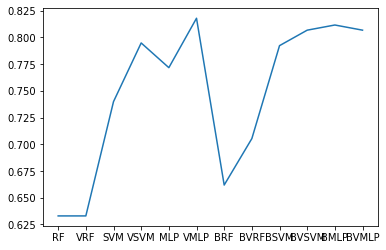

In [323]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(["RF", "VRF", "SVM", "VSVM", "MLP", "VMLP", "BRF", "BVRF", "BSVM", "BVSVM", "BMLP", "BVMLP"], scores)
plt.show()

## Conclusiones

Para este problema podemos ver que los mejores modelos fueron SVM y MLP, Random Forest tuvo un desempeño muy malo antes y después de variarlo y antes y después de intentar mejorar los datos de entrenamiento, MLP acabó siendo el mejor modelo incluso antes de variar los datos aunque nos hubiera gustado haber llegado a 90% de efectividad.